# Shinkansen Travel Experience
---

### Problem Statement

**The problem is to predict whether a passenger was satisfied or not** considering his/her overall experience of traveling on the Shinkansen Bullet Train. This exercise also aims to determine the relative importance of each parameter with regards to their contribution to the passengers’ overall travel experience.


### 1. Import Python Libraries

In [1]:
# import libraries for data manipulation and math calculations
import pandas as pd
import numpy as np

# import libraries for data visualization
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

# import libraries for data wrangling
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

# import libraries for model building, training, and testing
from sklearn.model_selection import train_test_split

# import sklear libraries for model evaluation
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# import warnings library to silence some obsolete elements, such as keyword, function or class, etc.
import warnings
warnings.filterwarnings("ignore")


### 2. Import Dataset

In [2]:
# Merge dataframes on same passengers id
# --------------------------------------

# survey dataset
survey_train = pd.read_csv('dataset/Surveydata_train.csv')
survey_test  = pd.read_csv('dataset/Surveydata_test.csv')

# travel dataset
travel_train = pd.read_csv('dataset/Traveldata_train.csv')
travel_test  = pd.read_csv('dataset/Traveldata_test.csv')

# Merge dataframes on same passengers id
# --------------------------------------

# train and test dataframe merge
train_df = pd.merge(survey_train, travel_train, on = 'ID')
test_df = pd.merge(survey_test, travel_test, on = 'ID')

train_df.head()


,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,...,Cleanliness,Online_Boarding,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,...,Needs Improvement,Poor,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,...,Good,Good,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,...,Excellent,Excellent,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,...,Acceptable,Acceptable,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,...,Good,Good,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


### 3. Exploratory Data Analysis

#### a. *Dataset description*

In [3]:
# Displaying the dataframe information. colums rows datatypes memory usaged
display(train_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Overall_Experience       94379 non-null  int64  
 2   Seat_Comfort             94318 non-null  object 
 3   Seat_Class               94379 non-null  object 
 4   Arrival_Time_Convenient  85449 non-null  object 
 5   Catering                 85638 non-null  object 
 6   Platform_Location        94349 non-null  object 
 7   Onboard_Wifi_Service     94349 non-null  object 
 8   Onboard_Entertainment    94361 non-null  object 
 9   Online_Support           94288 non-null  object 
 10  Ease_of_Online_Booking   94306 non-null  object 
 11  Onboard_Service          86778 non-null  object 
 12  Legroom                  94289 non-null  object 
 13  Baggage_Handling         94237 non-null  object 
 14  CheckIn_Service       

None

In [4]:
# Counting missing values on each feature
display(train_df.isna().sum())

ID                            0
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
dtype: int64

In [5]:
# decribing numberical features
display(train_df.iloc[:,2:].describe(include = [np.number]).T)

,count,mean,std,min,25%,50%,75%,max
Age,94346.0,39.419647,15.116632,7.0,27.0,40.0,51.0,85.0
Travel_Distance,94379.0,1978.888185,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0
Departure_Delay_in_Mins,94322.0,14.647092,38.138781,0.0,0.0,0.0,12.0,1592.0
Arrival_Delay_in_Mins,94022.0,15.005222,38.439409,0.0,0.0,0.0,13.0,1584.0


In [6]:
# decribing categorical features
display(train_df.describe(include = 'object').T)

,count,unique,top,freq
Seat_Comfort,94318,6,Acceptable,21158
Seat_Class,94379,2,Green Car,47435
Arrival_Time_Convenient,85449,6,Good,19574
Catering,85638,6,Acceptable,18468
Platform_Location,94349,6,Manageable,24173
Onboard_Wifi_Service,94349,6,Good,22835
Onboard_Entertainment,94361,6,Good,30446
Online_Support,94288,6,Good,30016
Ease_of_Online_Booking,94306,6,Good,28909
Onboard_Service,86778,6,Good,27265


#### *b. Univariate Analysis*

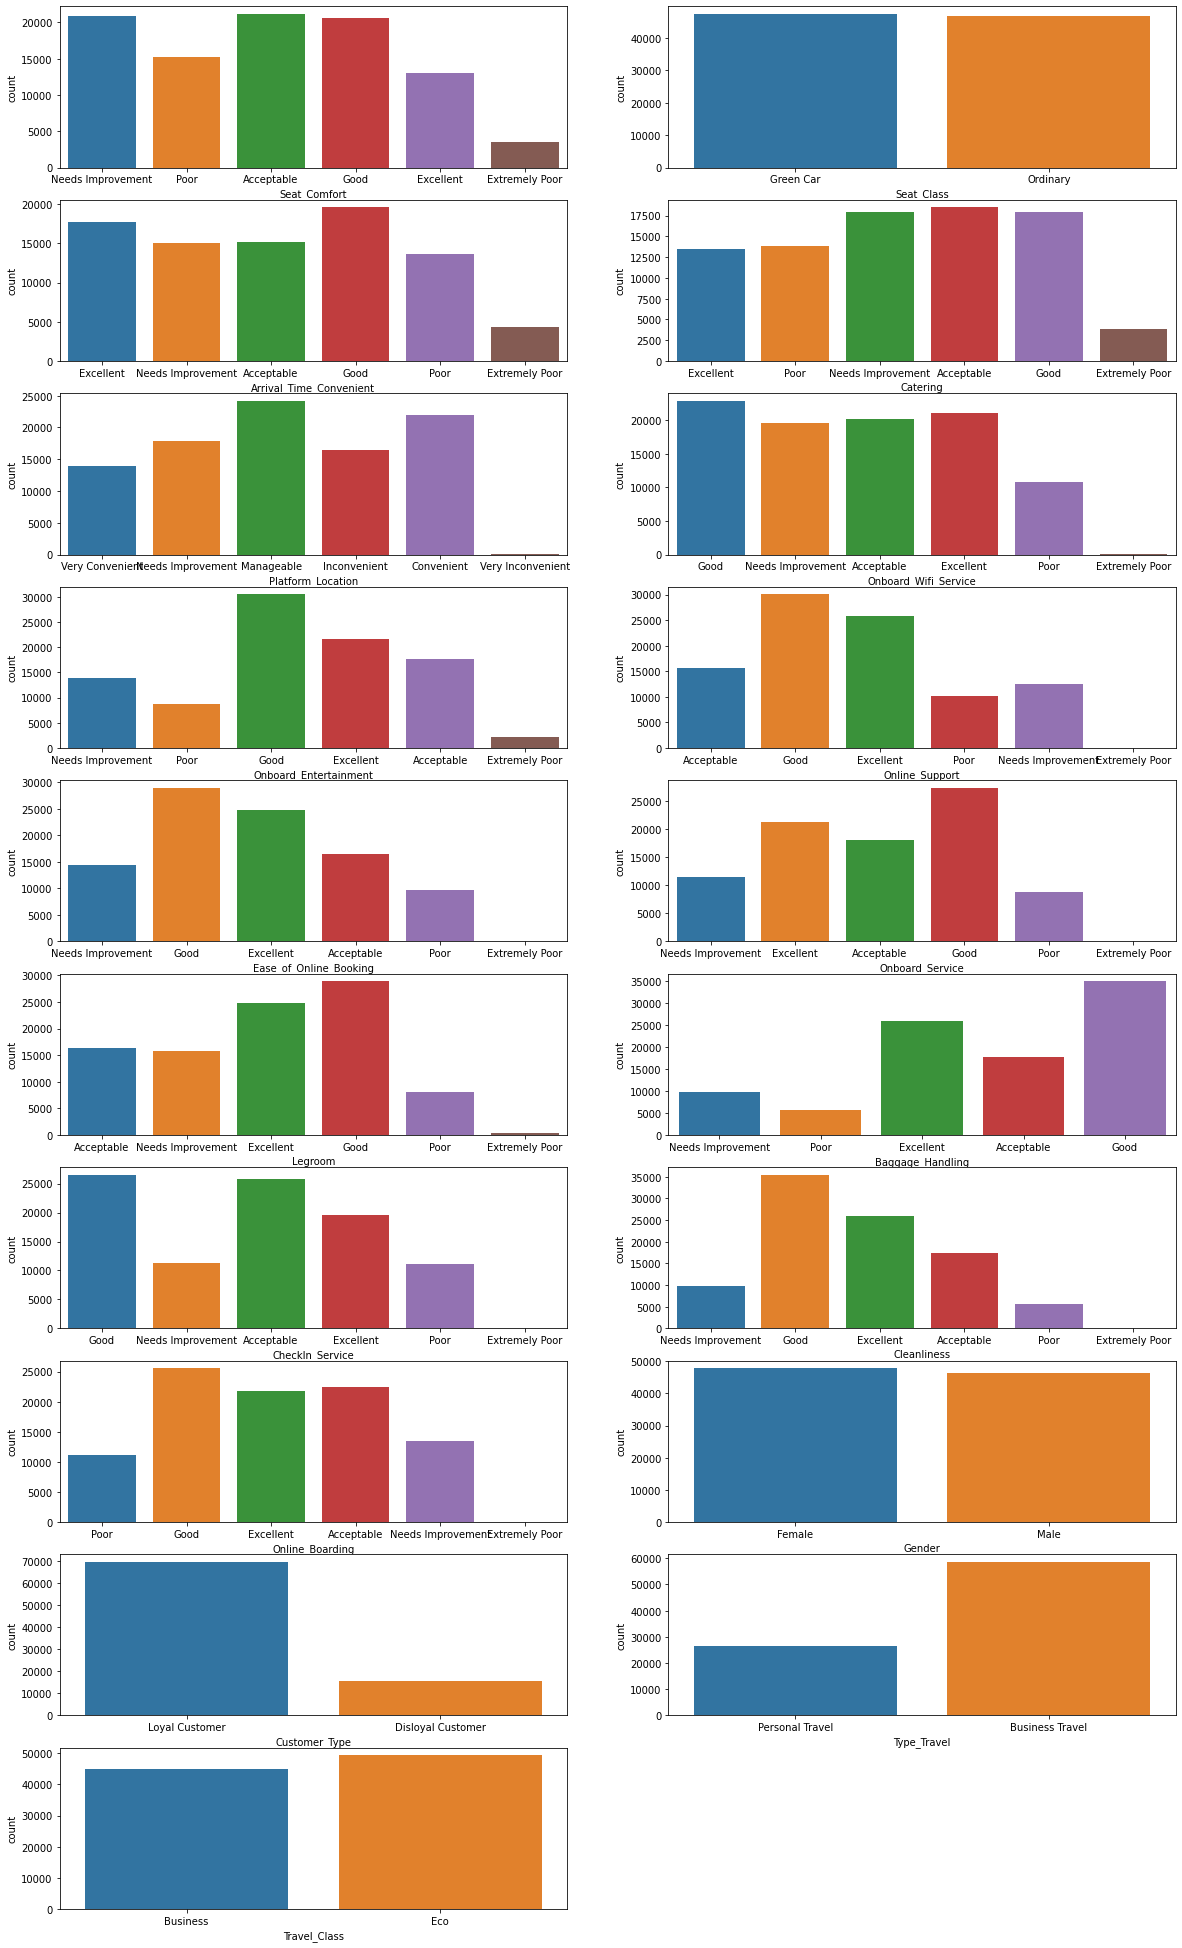

In [7]:
categoricalVariables = train_df.describe(include = 'object').T.index
fig = plt.figure(figsize=(20,35))
fig.tight_layout()
for i in range(len(categoricalVariables)):
    ax = plt.subplot(10, 2, i + 1)
    sns.countplot(train_df[categoricalVariables[i]])
 

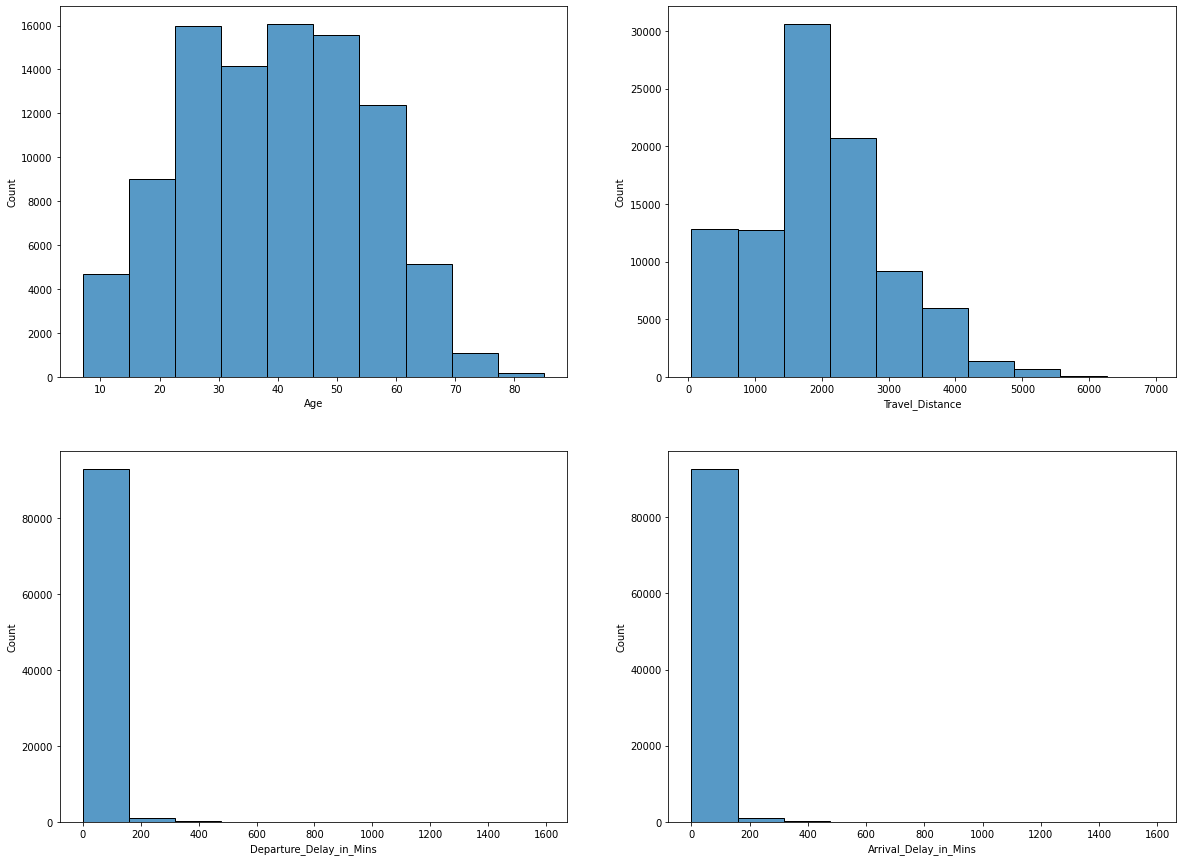

In [8]:
numericalVariables = train_df.iloc[:,2:].describe(include = [np.number]).T.index
fig = plt.figure(figsize=(20,15))
fig.tight_layout()
for i in range(len(numericalVariables)):
    ax = plt.subplot(2, 2, i + 1)
    sns.histplot(train_df[numericalVariables[i]], bins=10)


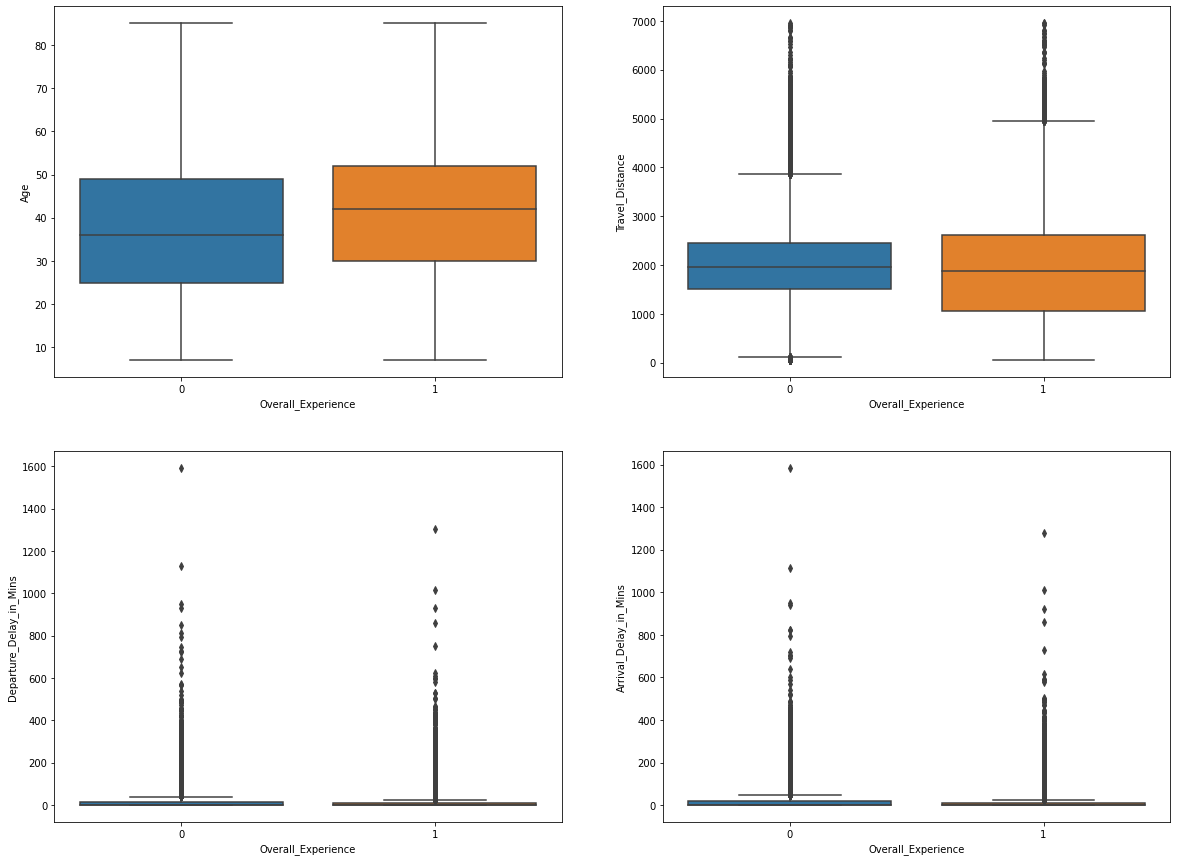

In [9]:
fig = plt.figure(figsize=(20,15))
fig.tight_layout()
for i in range(len(numericalVariables)):
    ax = plt.subplot(2, 2, i + 1)
    sns.boxplot(x = train_df.Overall_Experience ,y = train_df[numericalVariables[i]], )

#### *c. Bivariate Analysis*

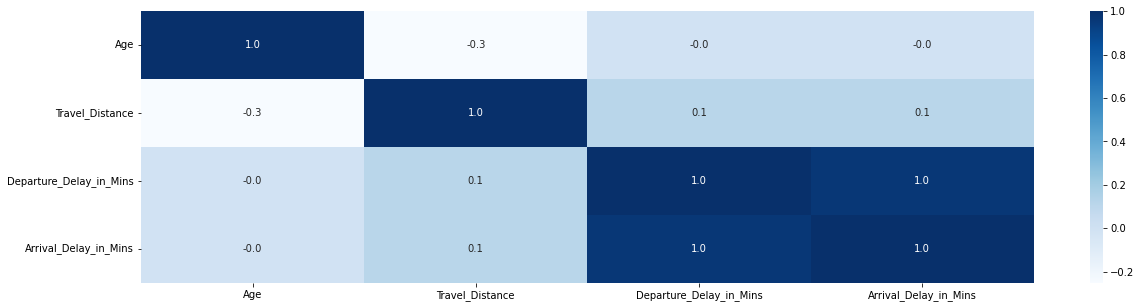

In [10]:
# Correlation 
# --------------------------------------
# Statistical technique that shows how two variables are related. It is used to find the pairwise 
# correlation of all columns in the dataframe. Any non-numeric data type columns in the 
# dataframe is ignored.

plt.figure(figsize = (20,5))
sns.heatmap(train_df[numericalVariables].corr(), annot = True, fmt='.1f', cmap = 'Blues')
plt.show()


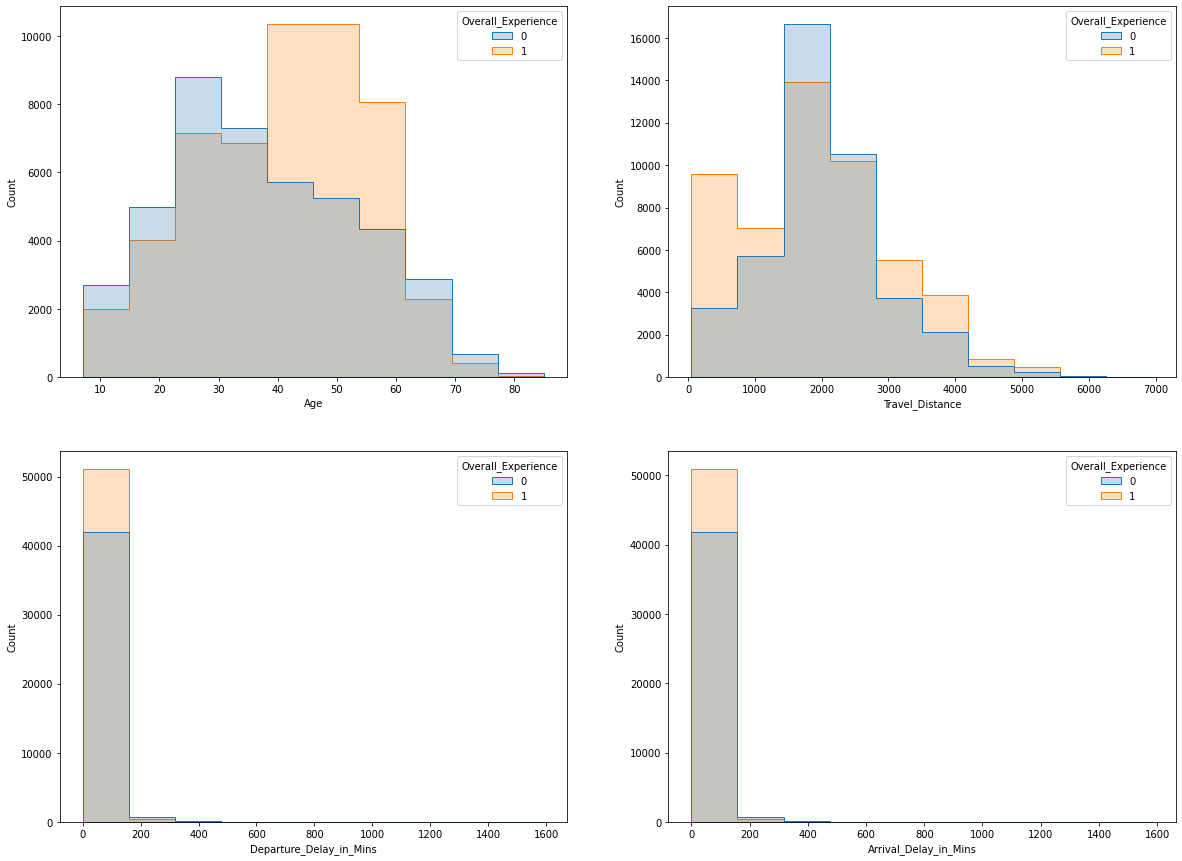

In [11]:
fig = plt.figure(figsize=(20,15))
for i in range(len(numericalVariables)):
    ax = plt.subplot(2, 2, i + 1)
    sns.histplot(x = numericalVariables[i], data = train_df, 
                    bins = 10, 
                    hue = 'Overall_Experience',
                    element= 'step'
                    )

### 4. Data Preprocessing

#### *a. Fill missing values (Imputation)*

In [12]:
# Filling Missing Values 
# --------------------------------------
# Missing values will be filled with the 'mode'.

def fillna(df):
    
    # Creating a list of columns with missing values
    missing_vals_cols = [col for col in df.columns if df[col].isna().any()]
    
    # Filling missing values with the mode of each feature
    for c in missing_vals_cols:
        df[c].fillna(df[c].value_counts().index[0], inplace = True)
        
fillna(train_df)
fillna(test_df)


#### *b. Encoding values*

In [13]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import label_binarize

# two classes categorical binary encoding using label_binarize
# Binarize labels in a one-vs-all fashion. Several regression and binary classification algorithms are available in scikit-learn. 
# A simple way to # extend these algorithms to the multi-class classification case is to use the so-called one-vs-all scheme.
# This function makes it possible to compute this transformation for a fixed set of class labels known ahead of time.


def categoricalEncoding(df):
    
    features        = df.select_dtypes(include='object').columns
    binaryFeatures  = ['Seat_Class', 'Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class']

    # categorical 'ordinal' econding
    classes1    = ['Extremely Poor', 'Poor', 'Needs Improvement', 'Acceptable', 'Good', 'Excellent']
    classes2    = ['Very Inconvenient', 'Inconvenient', 'Needs Improvement', 'Manageable', 
                    'Convenient', 'Very Convenient']

    for i in features:
        if i == 'Platform_Location':
            enc   = OrdinalEncoder(categories = [classes2])
            df[i] = enc.fit_transform(df[[i]])
        
        elif i in binaryFeatures:
            df[i] = label_binarize(df[i], classes = [df[i].unique()[0], df[i].unique()[1]])
        
        else:
            enc   = OrdinalEncoder(categories = [classes1])
            df[i] = enc.fit_transform(df[[i]])

categoricalEncoding(train_df)
categoricalEncoding(test_df)


#### *c. features scaling (standarization)*

In [14]:
from scipy.stats import zscore
X = train_df.iloc[:,2:].apply(zscore)
y = train_df['Overall_Experience']

X_validate = test_df.iloc[:,1:].apply(zscore)


#### *d. dataframe 80 : 20 train test split*

In [15]:
# train_test_split
# --------------------------------------
# Split arrays or matrices into random train and test subsets.
# More info: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

# 75:25 dataframe train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 13, stratify = y)

print("train_test_split")
print("--------------------------------------")
print("Train -> X_train : " + str(X_train.shape) + " | y_train : " + str(y_train.shape))
print("Test  -> X_test  : " + str(X_test.shape) + " | y_test  : " + str(y_test.shape))


train_test_split
--------------------------------------
Train -> X_train : (75503, 23) | y_train : (75503,)
Test  -> X_test  : (18876, 23) | y_test  : (18876,)


### 5. Model building, Training and Testing

In [16]:
# model performance evaluation
def model_Performance(model):
    
    # Training and testing prediction
    pred_train = model.predict(X_train)
    pred_test  = model.predict(X_test)

    # Accuracy score
    # The accuracy_score function computes the accuracy, either the fraction (default) 
    # or the count (normalize=False) of correct predictions. In multilabel classification, 
    # the function returns the subset accuracy. If the entire set of predicted labels for a 
    # sample strictly match with the true set of labels, then the subset accuracy is 1.0; 
    # otherwise it is 0.0.
    
    as_train = metrics.accuracy_score(y_train, pred_train)  
    as_test  = metrics.accuracy_score(y_test, pred_test)

    # F1 score
    # Also known as balanced F-score or F-measure. can be interpreted as a harmonic mean of the precision and 
    # recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative 
    # contribution of precision and recall to the F1 score are equal.
    
    f1_train = metrics.f1_score(y_train, pred_train)
    f1_test  = metrics.f1_score(y_test, pred_test)

    # Precision Score 
    # The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp 
    # the number of false positives. The precision is intuitively the ability of the classifier 
    # not to label as positive a sample that is negative. 
    # The best value is 1 and the worst value is 0.

    ps_train = metrics.precision_score(y_train, pred_train)
    ps_test  = metrics.precision_score(y_test, pred_test)

    # Recall Score 
    # The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn 
    # the number of false negatives. The recall is intuitively the ability of the classifier 
    # to find all the positive samples. 
    # The best value is 1 and the worst value is 0.

    re_train = metrics.recall_score(y_train, pred_train)
    re_test  = metrics.recall_score(y_test, pred_test)


    # printing performance matrics
    print('Model Perfromance: ' + str(model))
    print("--------------------------------------")
    print("Train data set ->  Accuracy: %0.3f   |   F1 score: %0.3f    |    Precision: %0.3f    |   Recall: %0.3f" % (as_train, f1_train, ps_train, re_train))
    print("Test data set  ->  Accuracy: %0.3f   |   F1 score: %0.3f    |    Precision: %0.3f    |   Recall: %0.3f" % (as_test, f1_test, ps_test, re_test))

# ploting feature's importance
def featureImportance_plot(model):
   
    importances = model.feature_importances_
    columns = X.columns
    importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by='Importance', ascending = False)

    #ploting feature importance chart
    plt.figure(figsize=(10, 5))
    sns.barplot(importance_df.Importance, importance_df.index)
    plt.title(str(model) + ' - Feature Importance')
    plt.xlabel('Coeficient Importance')


#### *a. Base classification algorithims:*

In [33]:
# LinearSVC
# --------------------------------------
# Applies a linear kernel function to perform classification. It performs well with a 
# large number of samples. Works with parameters L1 or L2 and loss function. 

from sklearn.svm import LinearSVC

# Model definition and fitting
lsvc = LinearSVC(C = 0.01)
lsvc.fit(X_train, y_train)

# Model Performance
model_Performance(lsvc)


Model Perfromance: LinearSVC(C=0.01)
--------------------------------------
Train data set ->  Accuracy: 0.833   |   F1 score: 0.848    |    Precision: 0.845    |   Recall: 0.851
Test data set  ->  Accuracy: 0.829   |   F1 score: 0.845    |    Precision: 0.840    |   Recall: 0.849


In [39]:
# KNeighborsClassifier
# --------------------------------------
# Is a non-parametric, supervised learning classifier, which uses proximity to 
# make classifications or predictions about the grouping of an individual data point.

from sklearn.neighbors import KNeighborsClassifier

# Model definition and fitting
knnc = KNeighborsClassifier()
knnc.fit(X_train, y_train)

# Model Performance
model_Performance(knnc)

Model Perfromance: KNeighborsClassifier()
--------------------------------------
Train data set ->  Accuracy: 0.936   |   F1 score: 0.941    |    Precision: 0.956    |   Recall: 0.926
Test data set  ->  Accuracy: 0.912   |   F1 score: 0.917    |    Precision: 0.936    |   Recall: 0.899


In [36]:
# SVC(rbf)
# --------------------------------------
# Works by mapping data points to a high-dimensional space and then finding the 
# optimal hyperplane that divides the data into two classes.

from sklearn.svm import SVC

# Model definition and fitting
rsvc = SVC(kernel = 'rbf')
rsvc.fit(X_train, y_train)

# Model Performance
model_Performance(rsvc)

Model Perfromance: SVC()
--------------------------------------
Train data set ->  Accuracy: 0.948   |   F1 score: 0.953    |    Precision: 0.951    |   Recall: 0.954
Test data set  ->  Accuracy: 0.940   |   F1 score: 0.945    |    Precision: 0.945    |   Recall: 0.946


Model Perfromance: DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_features=20)
--------------------------------------
Train data set ->  Accuracy: 0.922   |   F1 score: 0.928    |    Precision: 0.934    |   Recall: 0.922
Test data set  ->  Accuracy: 0.923   |   F1 score: 0.929    |    Precision: 0.934    |   Recall: 0.924


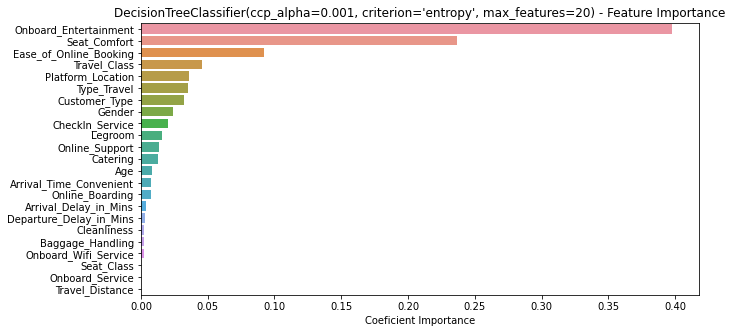

In [41]:
# DecisionTreeClassifier
# --------------------------------------
# A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), 
# the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a 
# decision tree is known as the root node. It learns to partition on the basis of the attribute value.

from sklearn.tree import DecisionTreeClassifier

# Model definition and fitting
dtc = DecisionTreeClassifier(ccp_alpha = 0.001, criterion = 'entropy', max_depth = None, max_features = 20, min_samples_split = 2)
dtc.fit(X_train, y_train)

# Model Performance
model_Performance(dtc)
featureImportance_plot(dtc)

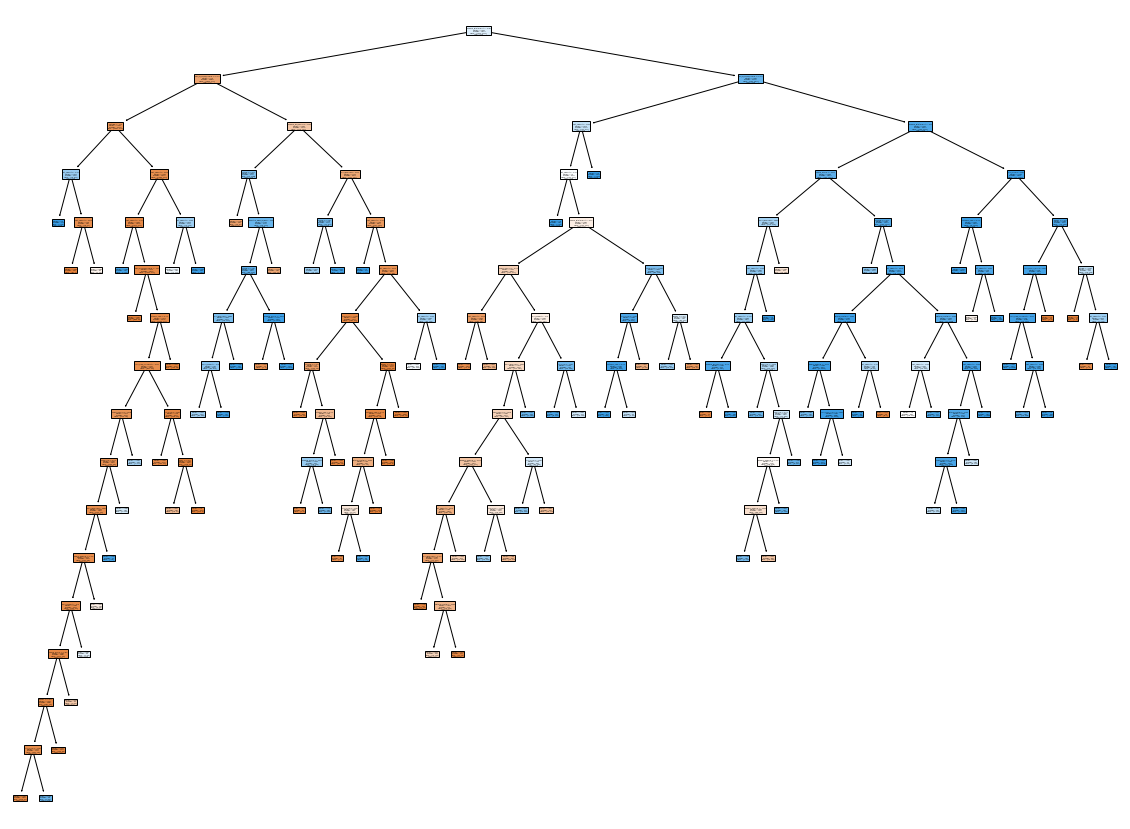

In [14]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree(dtc, filled = True,
        feature_names=X_train.columns,
        class_names= ['bad', 'good'])
plt.show();

In [18]:
print(classification_report(y_test, dtc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      8557
           1       0.91      0.93      0.92     10319

    accuracy                           0.91     18876
   macro avg       0.91      0.91      0.91     18876
weighted avg       0.91      0.91      0.91     18876



In [ ]:

# DecisionTreeClassifier
# GridSearchCV (Hyperparameters Tunning)
# --------------------------------------

from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion' : ['gini','entropy'],
    'max_depth' : [3, 5, 7 , 9, None],
    'max_features' : [10, 15, 20],
    'min_samples_split' : [2, 4, 6, 9],
    'ccp_alpha' : [0.1, 0.01, 0.001] 
}

# Model definition and fitting
gsdtc = GridSearchCV(DecisionTreeClassifier(), param_grid = param_grid, cv = 10, n_jobs = -1)
gsdtc.fit(X_train, y_train)

# Model Performance
model_Performance(gsdtc)
print("best params  : " + str(gsdtc.best_params_))

#### *b. Ensemble classifiers algorithims:* 


Model Perfromance: RandomForestClassifier(ccp_alpha=0.0001, max_depth=20, max_features=15,
                       n_estimators=220, random_state=100)
--------------------------------------
Train data set ->  Accuracy: 0.952   |   F1 score: 0.956    |    Precision: 0.963    |   Recall: 0.949
Test data set  ->  Accuracy: 0.946   |   F1 score: 0.950    |    Precision: 0.955    |   Recall: 0.945


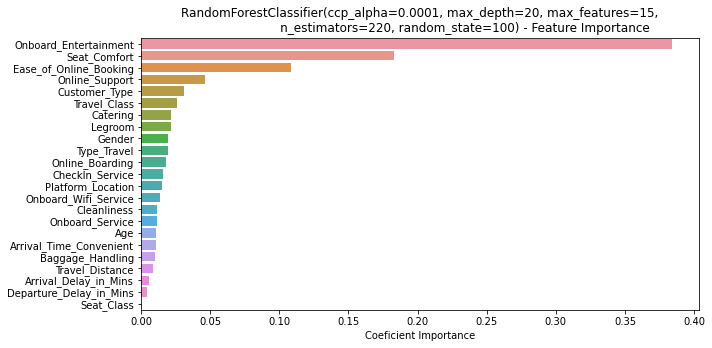

In [17]:
# RandomForestClassifier
# --------------------------------------
# it generates small decision trees using random subsamples of the dataset where the collection 
# of the generated decision tree is defined as forest. Every individual tree is created using 
# an attribute selection indicator such as entropy, information gain, etc. In classification, 
# problem voting is done by each tree and the most voted class is considered the final result 

from sklearn.ensemble import RandomForestClassifier

# Model definition and fitting
rfc = RandomForestClassifier(ccp_alpha = 0.0001, n_estimators = 220, max_depth = 20, max_features = 15, random_state = 100)
rfc.fit(X_train, y_train)

# Model Performance
model_Performance(rfc)
featureImportance_plot(rfc)


In [18]:
print(classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      8557
           1       0.96      0.94      0.95     10319

    accuracy                           0.95     18876
   macro avg       0.94      0.95      0.95     18876
weighted avg       0.95      0.95      0.95     18876



In [ ]:
# RandomForestClassifier
# GridSearchCV (Hyperparameters Tunning)
# --------------------------------------

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150, 200], 
    'max_depth': [15, 20], 
    'max_features': [5, 10],
    'ccp_alpha' : [0.1, 0.01, 0.001] 
    }

gsrfc = GridSearchCV(RandomForestClassifier(), param_grid = param_grid, cv = 10)
gsrfc.fit(X_train,y_train) 

model_Performance(gsrfc)
print("best params : " + str(gsrfc.best_params_))


In [42]:
# VotingClassifier
# --------------------------------------
# The idea behind the VotingClassifier is to combine conceptually different machine learning classifiers and use a 
# majority vote (hard vote) or the average predicted probabilities (soft vote) to predict the class labels. Such 
# a classifier can be useful for a set of equally well performing models in order to balance out their individual 
# weaknesses.
# further info: https://scikit-learn.org/stable/modules/ensemble.html#voting-classifier

from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators = [('LinearSVC', lsvc), ('KNeighborsClassifier', knnc), ('SVC(rbf)', rsvc), ('DecisionTreeClassifier', dtc)], voting = 'hard')
vc.fit(X_train, y_train)

# Model Performance
model_Performance(vc)


Model Perfromance: VotingClassifier(estimators=[('LinearSVC', LinearSVC(C=0.01)),
                             ('KNeighborsClassifier', KNeighborsClassifier()),
                             ('SVC(rbf)', SVC()),
                             ('DecisionTreeClassifier',
                              DecisionTreeClassifier(ccp_alpha=0.001,
                                                     criterion='entropy',
                                                     max_features=20))])
--------------------------------------
Train data set ->  Accuracy: 0.935   |   F1 score: 0.939    |    Precision: 0.963    |   Recall: 0.916
Test data set  ->  Accuracy: 0.922   |   F1 score: 0.926    |    Precision: 0.954    |   Recall: 0.900


### 6. Validation

In [45]:
# Cross-validation:
# --------------------------------------
# Cross-validation is a resampling method that uses n portions of the data to test and train 
# a model on n iterations. It is mainly used in settings where the goal is prediction, 
# and one wants to estimate how accurately a predictive model will perform in practice.
# More info: https://scikit-learn.org/stable/modules/cross_validation.html


from sklearn.model_selection import cross_val_score

print("cross_val_score")
print("--------------------------------------")
for clf, label in zip([rsvc, rfc, vc], ['SVC(rbf)', 'RandomForestClassifier', 'VotingClassifier']):
    scores = cross_val_score(clf, X, y, scoring = 'accuracy', cv = 5)
    print("Accuracy: %0.3f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))
    

cross_val_score
--------------------------------------
Accuracy: 0.939 (+/- 0.001) [SVC(rbf)]
Accuracy: 0.946 (+/- 0.001) [RandomForestClassifier]
Accuracy: 0.921 (+/- 0.002) [VotingClassifier]


### 7. Results

**Model Random Forest Classifier (rfc) perform as the best model** to work with this dataset. Performance metrics are:

* Train data set ->  Accuracy: 0.952   |   F1 score: 0.956    |    Precision: 0.963    |   Recall: 0.949
* Test data set  ->  Accuracy: 0.946   |   F1 score: 0.950    |    Precision: 0.955    |   Recall: 0.945
* Cross Validation Accuracy: Accuracy: 0.946 (+/- 0.001) [RandomForestClassifier]

This *Accuracy* factor shows the model is able to predict 95% of observations. A Precision and Recall of also 95, indicate this model is correctly classifying labels at a very high ratio.

**Predictors Onboard Entertainment, Easy of Online Booking, Online Support and Seat Comfort** are the most significant variables to determine this high accurracy score.

Other general observations about this model’s performance are that the data set does not allow to improve accuracy, maybe because there is not a neat relationship between the observations and the outcome. There is noise, hidden barriers, a lot of unquantifiable metrics, missing variables, as there is the personality and inclination of those who filled the form. All elements capping maximum predictive performance

Find below some charts to ilustrate de results:

a. Confusion Matrix
b. Feature Importance

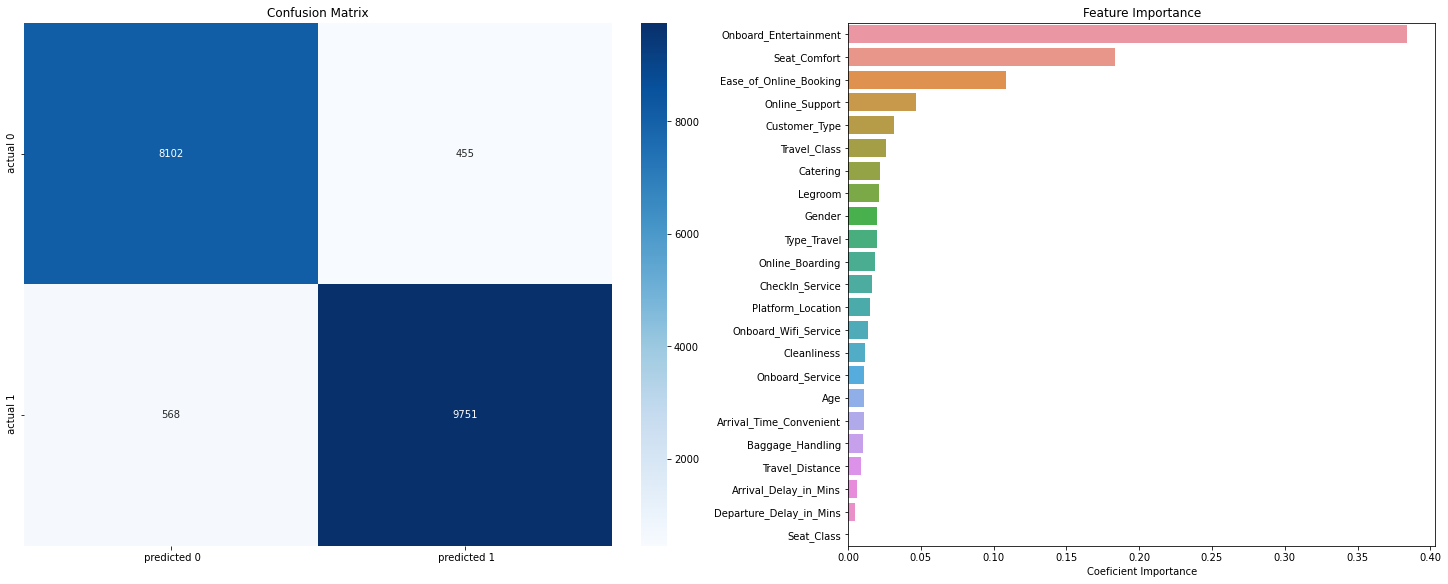

In [21]:
# Summary Grid Chart
# --------------------------------------

y_pred = rfc.predict(X_test)

fig = plt.figure(constrained_layout=True, figsize = (20,8))
gs = GridSpec(1, 2, figure=fig)

# --------------------------------------
ax1 = fig.add_subplot(gs[0, 0])

def plot_confusionMatrix(y_true, y_pred):
    
    labels = unique_labels(y_true)
    columns = [f' predicted {label}' for label in labels]
    index = [f' actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns=columns, index=index)
    sns.heatmap(table, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')

plot_confusionMatrix(y_test, y_pred)

# --------------------------------------
ax2 = fig.add_subplot(gs[0, 1])

def featureImportance_grid_plot(model):

    importances = model.feature_importances_
    columns = X.columns
    importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by='Importance', ascending = False)

    #ploting feature importance chart
    sns.barplot(importance_df.Importance, importance_df.index)
    plt.title('Feature Importance')
    plt.xlabel('Coeficient Importance')

featureImportance_grid_plot(rfc)

# --------------------------------------
fig.savefig('./imgs/summary_plt.jpg')

plt.show()